# K Nearest Neighbor Algorithm classifiction for Glass dataset

# KNN Project

In [66]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import (FunctionTransformer, StandardScaler) 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn import preprocessing
%matplotlib inline 
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [2]:
# setting plotting parameters
#np.set_printoptions(precision=4,suppress=True)
#%matplotlib inline
#rcParams['figure.figsize']=7,4
#plt.style.use('seaborn-whitegrid')

In [3]:
names = ['id', 'refractive-index','Sodium','Magnesium','Aluminum','Silicon','Potassium','Calcium','Barium','Iron','class']
url= 'https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
df=pd.read_csv(url,names=names)

# Summarize the Dataset

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
id                  214 non-null int64
refractive-index    214 non-null float64
Sodium              214 non-null float64
Magnesium           214 non-null float64
Aluminum            214 non-null float64
Silicon             214 non-null float64
Potassium           214 non-null float64
Calcium             214 non-null float64
Barium              214 non-null float64
Iron                214 non-null float64
class               214 non-null int64
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


### No null values and the data is clean

In [4]:
print(df.head())

   id  refractive-index  Sodium  Magnesium  Aluminum  Silicon  Potassium  \
0   1           1.52101   13.64       4.49      1.10    71.78       0.06   
1   2           1.51761   13.89       3.60      1.36    72.73       0.48   
2   3           1.51618   13.53       3.55      1.54    72.99       0.39   
3   4           1.51766   13.21       3.69      1.29    72.61       0.57   
4   5           1.51742   13.27       3.62      1.24    73.08       0.55   

   Calcium  Barium  Iron  class  
0     8.75     0.0   0.0      1  
1     7.83     0.0   0.0      1  
2     7.78     0.0   0.0      1  
3     8.22     0.0   0.0      1  
4     8.07     0.0   0.0      1  


### Assessing outliers incase exist

In [60]:

outliers = outlier_hunt(df[features])
df = df.drop(outliers).reset_index(drop=True)
print(df.shape)

NameError: name 'outlier_hunt' is not defined

In [5]:
df.shape

(214, 11)

In [6]:
df.describe() # to make sure all the values in "count" are the same

,id,refractive-index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,class
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
# viewing the number of rows that belong to each class
df.groupby('class').size()

class
1    70
2    76
3    17
5    13
6     9
7    29
dtype: int64

In [8]:
for feat in features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde=False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

NameError: name 'features' is not defined

### Standardize the Data
I used standard scaler to standardize the feature columns of glassand assign it to a new variable by excluding the target column, class. The features are not on the same scale. For example Si has a mean of 72.65 while Fe has a mean value of 0.057. Features should be on the same scale for algorithms such as logistic regression (gradient descent) to converge smoothly. Let's go ahead and check the distribution of the glass types.

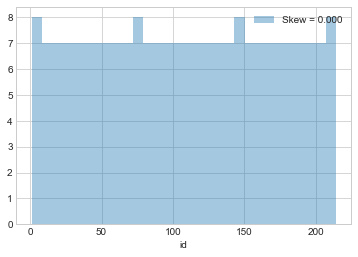

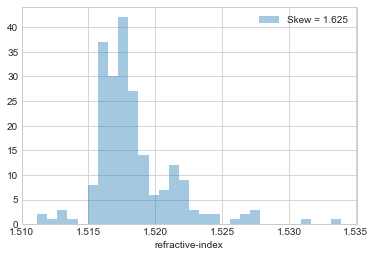

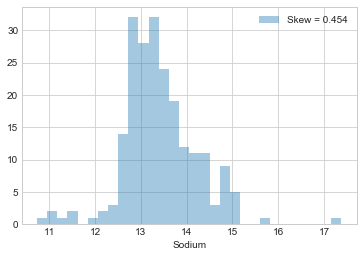

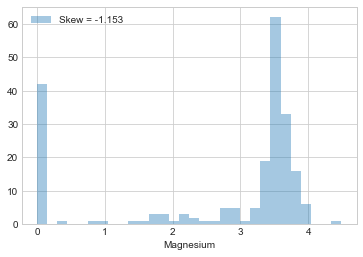

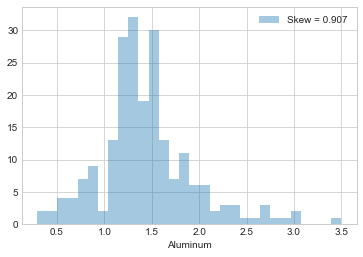

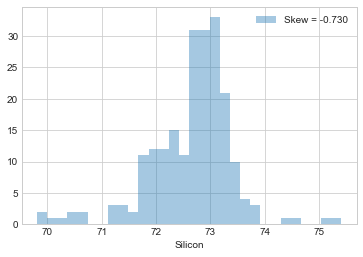

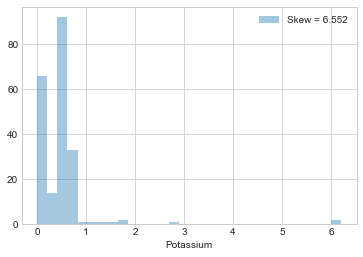

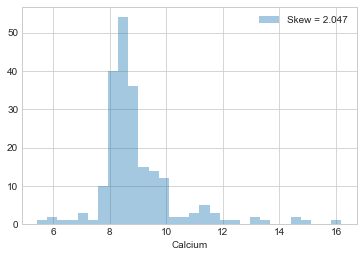

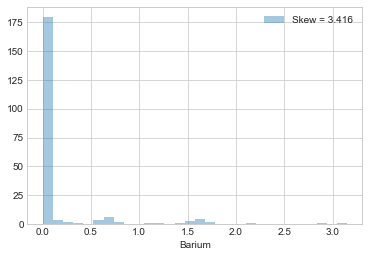

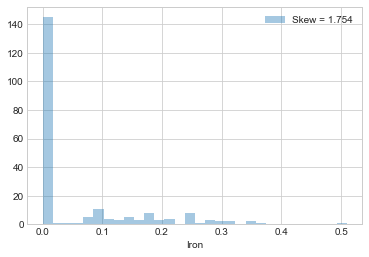

In [64]:
features = df.columns[:-1].tolist()
for feat in features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [56]:
x_prime = df.iloc[:, 1:9].values
y = df.iloc[:, 10].values
# scalling the X_prime values
X=preprocessing.scale(x_prime)

In [57]:
# replacing zeroes,
zero_not_accepted= ['refractive-index','class']
for column in zero_not_accepted:
    df[column]=df[column].replace(0,np.NaN)
    mean= int(df[column].mean(skipna=True))
    df[column]=df[column].replace(np.NAN,mean)

In [18]:
np.isnan(X).any()

False

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### What did you understand about data?

# Data VIsualization

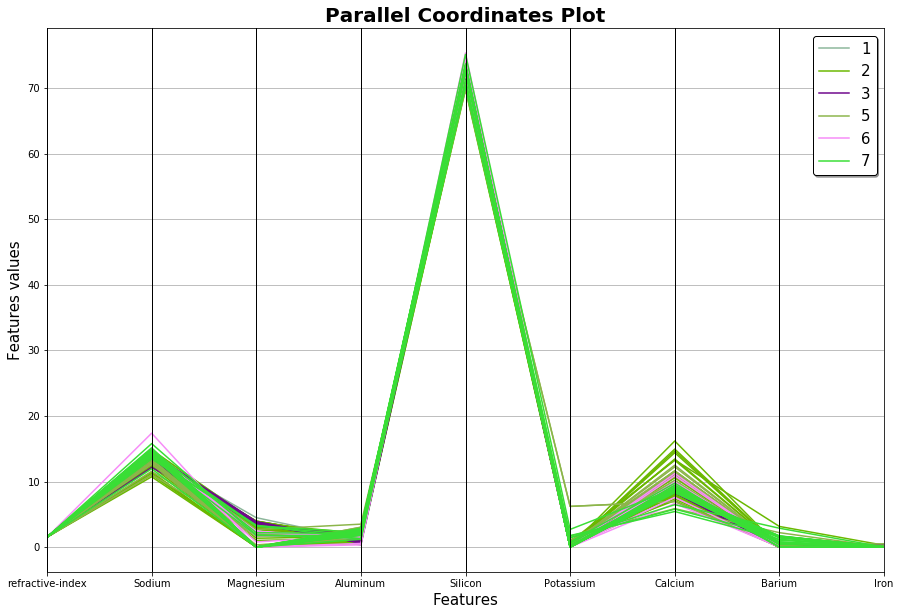

In [41]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(df.drop("id", axis=1), "class")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

<Figure size 432x288 with 0 Axes>

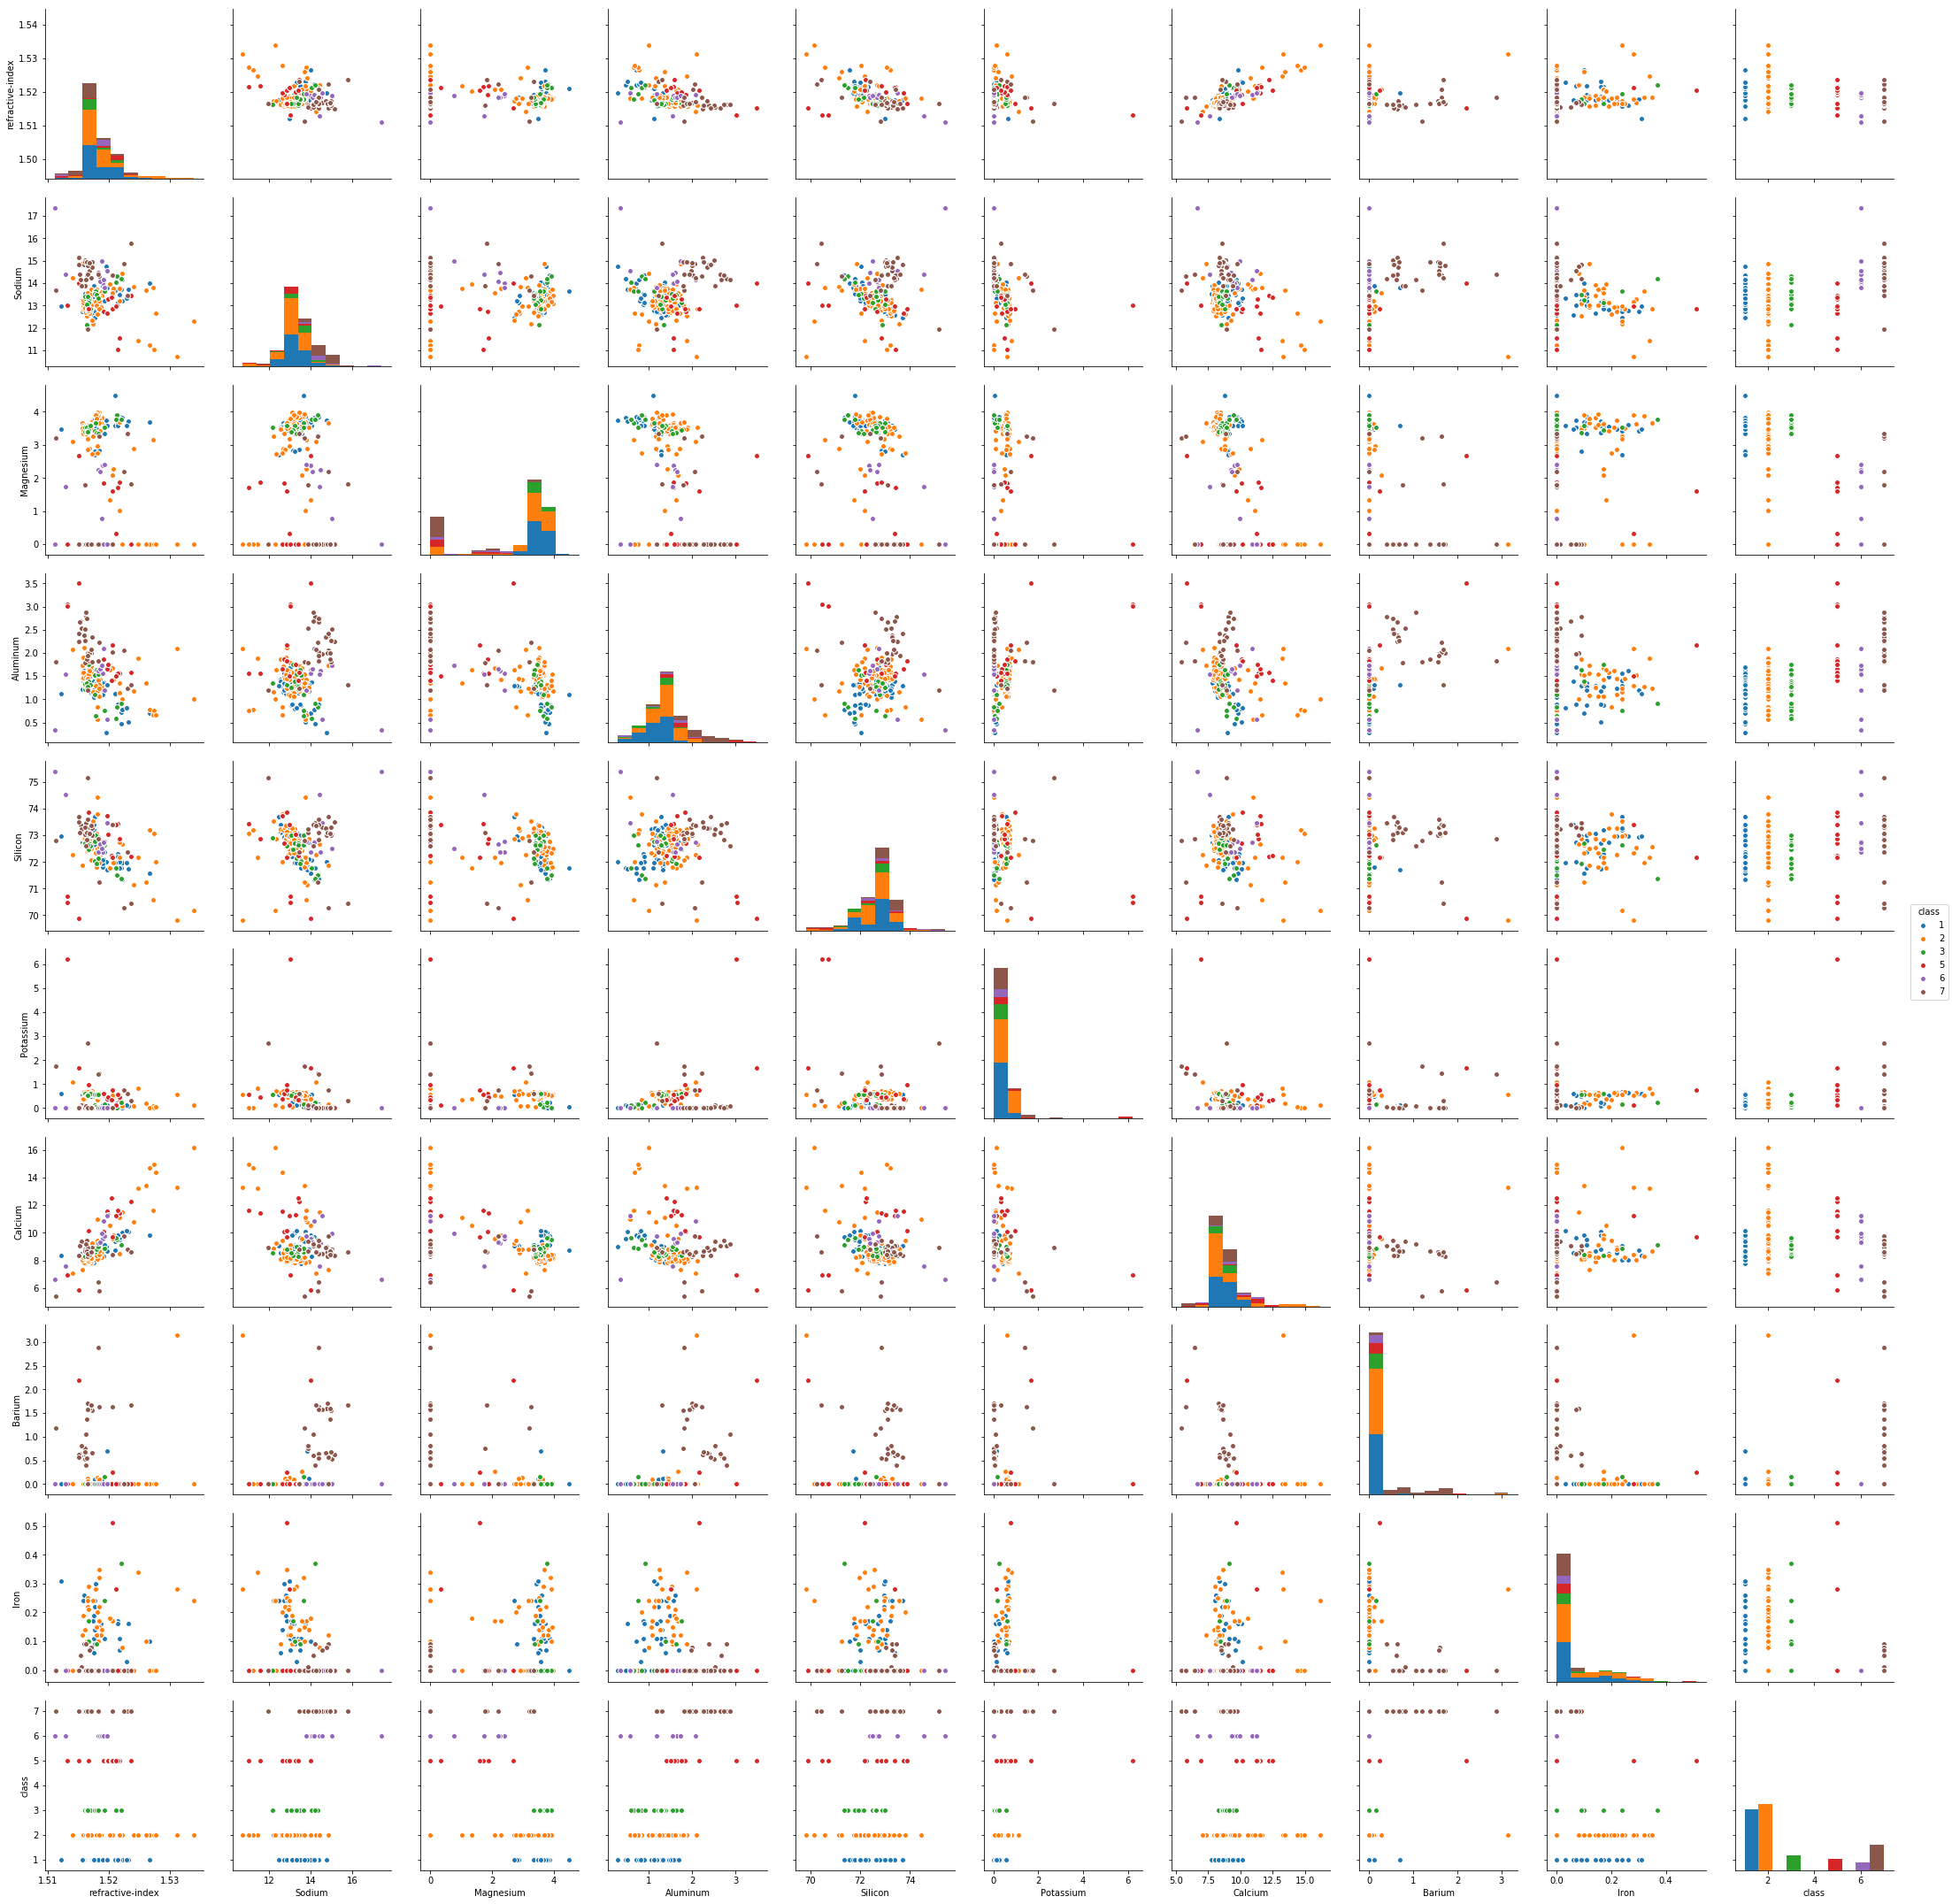

In [43]:
plt.figure()
sns.pairplot(df.drop("id", axis=1), hue = "class", size=3)
plt.show()

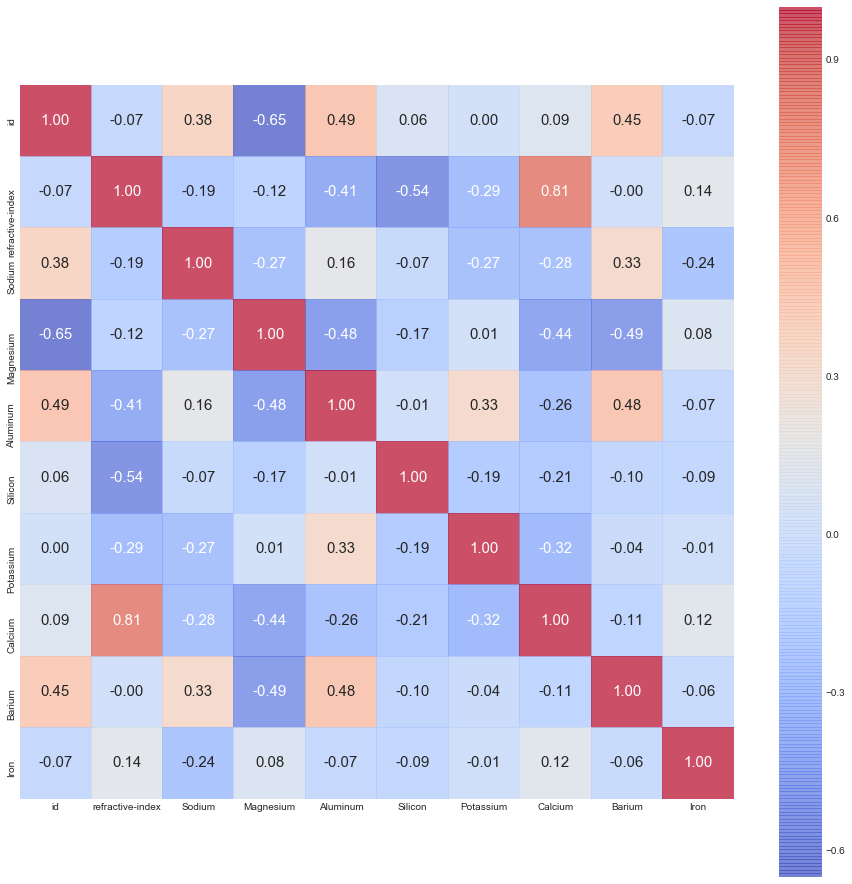

In [65]:
corr = df[features].corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features, yticklabels= features, alpha = 0.7,   cmap= 'coolwarm')
plt.show()

### There seems to be a strong positive correlation between RI and Ca. TPlease find below at the PCA how this info has assted me to  perform the Principal component analysis  to decorrelate some of the input features.

## splitting data into test and training dataset

In [67]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

## Building and training model with training data

In [68]:
clf= neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)
print(clf)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


## Evaluating model's predictions against the test dataset

In [69]:
# assuing y_expect = y_test
y_expect= y_test
y_pred=clf.predict(X_test)
print(metrics.classification_report(y_expect, y_pred))

             precision    recall  f1-score   support

          1       0.61      0.77      0.68        22
          2       0.59      0.64      0.62        25
          3       0.00      0.00      0.00         4
          5       0.75      0.50      0.60         6
          6       1.00      0.50      0.67         4
          7       0.90      0.90      0.90        10

avg / total       0.64      0.66      0.64        71



#  Using KNN for classification

In [70]:
# to get the n_neigbour value,
import math
math.sqrt( len(y_test))
# rounding to odd number, which is 8-1=7

8.426149773176359

In [71]:
# Instantiate learning model 
classifier = KNeighborsClassifier(n_neighbors=7)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [72]:
# Evaluating predictions by building confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[17,  5,  0,  0,  0,  0],
       [ 9, 14,  1,  0,  1,  0],
       [ 3,  1,  0,  0,  0,  0],
       [ 1,  2,  0,  3,  0,  0],
       [ 0,  1,  0,  0,  2,  1],
       [ 0,  1,  0,  0,  0,  9]], dtype=int64)

In [73]:
# calculating model accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 1)) + ' %.')

Accuracy of our model is equal 63.4 %.


# Conclusion, the accuracy of 63.4 % at n_neighbours = 7 entails that it is not well fit in the model! It needs more tunning,

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[0.56521739 0.56521739 0.86956522 0.81818182 0.63636364 0.77272727
 0.85714286 0.55       0.8        0.77777778]


In [77]:
# scores is a numpy array so we can use the mean method
print(scores.mean())

0.7212193362193362


In [81]:
# search for an optimal value of K for KNN
# list of integers 1 to 30
k_range = range(1, 31)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.724575883054144, 0.7310217077608382, 0.7056264508438421, 0.7354893657067569, 0.7212193362193362, 0.6871688939080244, 0.6806462136896919, 0.6615957713783801, 0.6622479452914235, 0.6702914235522931, 0.6657459690068386, 0.6653318903318903, 0.6564386096994793, 0.6520907836125227, 0.6475453290670682, 0.6520907836125227, 0.6477429575255662, 0.6431975029801117, 0.6433951314386097, 0.6340473053516532, 0.6303516531777402, 0.6298971077231947, 0.6381382144425622, 0.6246994792646967, 0.6344425622686493, 0.6246994792646967, 0.6038264633916808, 0.6183907396950875, 0.6086288349331828, 0.6047355543007716]


Text(0,0.5,'Cross-Validated Accuracy')

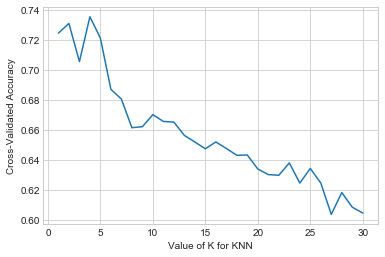

In [82]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

the above plot reveals that cross validated accuracy is high when k=2 and then jumps back high revealing that k=4 is the optimum value. Now lets build our model using k=4 

# Parameter Tuning with Cross Validation

In [83]:
# creating odd list of K for KNN
myList = list(range(1,50))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=7, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 1


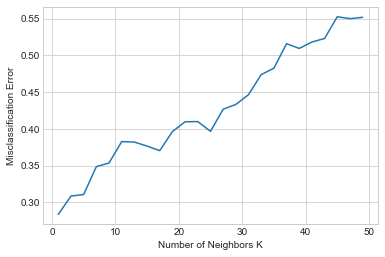

In [84]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

the above plot reveals that error is lowest when k=1 and then jumps back high revealing that k=3 is the optimum value. Now lets build our model using k=3 and assess it

# Principal Component Analysis 

### the ideal PCA is when the mean=0, variance =1

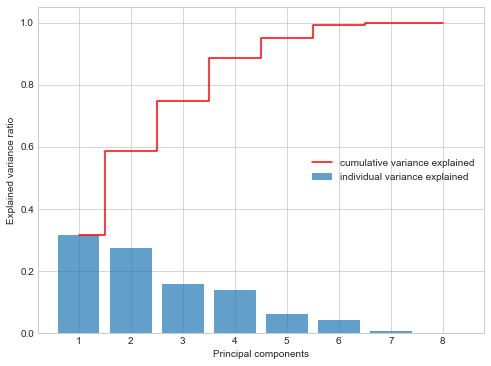

PC1 Cumulative variance: 31.500%
PC2 Cumulative variance: 58.847%
PC3 Cumulative variance: 74.696%
PC4 Cumulative variance: 88.598%
PC5 Cumulative variance: 94.972%
PC6 Cumulative variance: 99.252%
PC7 Cumulative variance: 99.977%
PC8 Cumulative variance: 100.000%


In [92]:
from sklearn.decomposition import PCA
pca = PCA(random_state =5)
pca.fit(X_train)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
plt.figure(figsize=(8,6))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'individual variance explained', \
       alpha = 0.7)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'cumulative variance explained', \
        color= 'red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(np.arange(1,len(var_exp)+1,1))
plt.legend(loc='center right')
plt.show()
for i, sum in enumerate(cum_var_exp):
    print("PC" + str(i+1), "Cumulative variance: %.3f% %" %(cum_var_exp[i]*100))

PC1 Cumulative variance: 31.500%
PC2 Cumulative variance: 58.847%
PC3 Cumulative variance: 74.696%
PC4 Cumulative variance: 88.598%
PC5 Cumulative variance: 94.972%
PC6 Cumulative variance: 99.252%
PC7 Cumulative variance: 99.977%
PC8 Cumulative variance: 100.000%


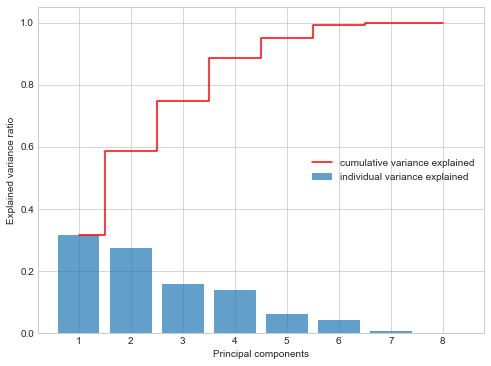

PC1 Cumulative variance: 31.500%
PC2 Cumulative variance: 58.847%
PC3 Cumulative variance: 74.696%
PC4 Cumulative variance: 88.598%
PC5 Cumulative variance: 94.972%
PC6 Cumulative variance: 99.252%
PC7 Cumulative variance: 99.977%
PC8 Cumulative variance: 100.000%


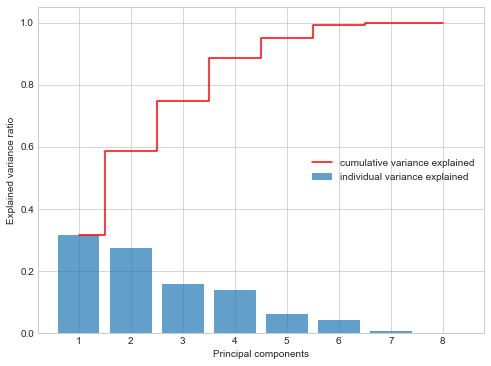

PC1 Cumulative variance: 31.500%
PC2 Cumulative variance: 58.847%
PC3 Cumulative variance: 74.696%
PC4 Cumulative variance: 88.598%
PC5 Cumulative variance: 94.972%
PC6 Cumulative variance: 99.252%
PC7 Cumulative variance: 99.977%
PC8 Cumulative variance: 100.000%


In [91]:
# Cumulative variance explained
for i, sum in enumerate(cum_var_exp):
    print("PC" + str(i+1), "Cumulative variance: %.3f% %" %(cum_var_exp[i]*100))
pca = PCA(random_state = 42)
pca.fit(X_train)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
plt.figure(figsize=(8,6))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'individual variance explained', \
       alpha = 0.7)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'cumulative variance explained', \
        color= 'red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(np.arange(1,len(var_exp)+1,1))
plt.legend(loc='center right')
plt.show()

# Cumulative variance explained
for i, sum in enumerate(cum_var_exp):
    print("PC" + str(i+1), "Cumulative variance: %.3f% %" %(cum_var_exp[i]*100))
pca = PCA(random_state = 42)
pca.fit(X_train)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
plt.figure(figsize=(8,6))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'individual variance explained', \
       alpha = 0.7)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'cumulative variance explained', \
        color= 'red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(np.arange(1,len(var_exp)+1,1))
plt.legend(loc='center right')
plt.show()

# Cumulative variance explained
for i, sum in enumerate(cum_var_exp):
    print("PC" + str(i+1), "Cumulative variance: %.3f% %" %(cum_var_exp[i]*100))

In [94]:
cd C:\Users\user\Desktop\my_git

C:\Users\user\Desktop\my_git


In [95]:
pwd

'C:\\Users\\user\\Desktop\\my_git'